In [22]:


def manacher( s: str) -> str:
    """
    search outwards from each character using manacher's algorithm
    """

    if len(s) < 2:
        return s

    processed_string = '#'.join('^{}S'.format(s))
    length = len(processed_string)
    lps = [0] * length
    center = right = max_lps_length = max_lps_position = 0

    for offset, _ in islice(enumerate(processed_string), 1, length - 1):

        # check if within previous range of previous largest palindrome
        if offset < right:
            # left|mirror = 2 * center - offset
            lps[offset] = min(lps[2 * center - offset], right - offset)

        # check if within range and if so, expand from current character to left and right and compare them
        while (offset + lps[offset] + 1 < length and offset - lps[offset] - 1 > 0 and processed_string[
            (offset + lps[offset] + 1)] == processed_string[
                    (offset - lps[offset] - 1)]):
            lps[offset] += 1

        if lps[offset] > max_lps_length:
            max_lps_length = lps[offset]
            max_lps_position = offset

        if offset + lps[offset] > right:
            center = offset
            right = offset + lps[offset]

    start = (max_lps_position - max_lps_length) // 2
    end = start + max_lps_length - 1
    return s[start:end + 1]



In [23]:
manacher("asas")

'asa'

In [30]:
import random, string, datetime
import matplotlib.pyplot as plt


def random_word(length):
   letters = string.ascii_lowercase
   return ''.join(random.choice(string.ascii_letters.lower()[:2]) for y in range(length))

In [32]:
def plot(x,y,algorithm_type):
  plt.plot(y, x)
  plt.xlabel('problem size')
  plt.ylabel('running time in miliseconds')
  plt.title(algorithm_type)
  plt.show()
def emperical_analysis(fn,algorithm_type):
  input_size=[]
  time=[]
  for k in range(1,1000):
    #print(k)
    rand_str_size=k*100
    rand_str = random_word(rand_str_size)
    input_size.append(rand_str_size)
    start_time = datetime.datetime.now()
    fn(rand_str)
    end_time =  datetime.datetime.now()
    time_elapsed = (end_time - start_time)
    time_elapsed = int(time_elapsed.total_seconds() * 1000)
    time.append(time_elapsed)
  plot(time,input_size,algorithm_type)


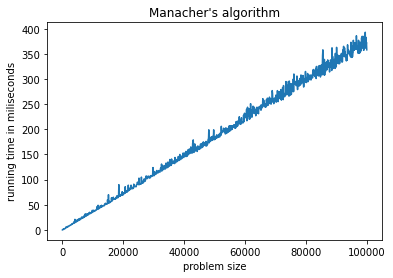

In [33]:
emperical_analysis(manacher,"Manacher's algorithm")

In [ ]:
def fastLongestPalindromes(seq):
    """
    Behaves identically to naiveLongestPalindrome (see below), but
    runs in linear time.
    """
    seqLen = len(seq)
    l = []
    i = 0
    palLen = 0
    # Loop invariant: seq[(i - palLen):i] is a palindrome.
    # Loop invariant: len(l) >= 2 * i - palLen. The code path that
    # increments palLen skips the l-filling inner-loop.
    # Loop invariant: len(l) < 2 * i + 1. Any code path that
    # increments i past seqLen - 1 exits the loop early and so skips
    # the l-filling inner loop.
    while i < seqLen:
        # First, see if we can extend the current palindrome.  Note
        # that the center of the palindrome remains fixed.
        if i > palLen and seq[i - palLen - 1] == seq[i]:
            palLen += 2
            i += 1
            continue

        # The current palindrome is as large as it gets, so we append
        # it.
        l.append(palLen)

        # Now to make further progress, we look for a smaller
        # palindrome sharing the right edge with the current
        # palindrome.  If we find one, we can try to expand it and see
        # where that takes us.  At the same time, we can fill the
        # values for l that we neglected during the loop above. We
        # make use of our knowledge of the length of the previous
        # palindrome (palLen) and the fact that the values of l for
        # positions on the right half of the palindrome are closely
        # related to the values of the corresponding positions on the
        # left half of the palindrome.

        # Traverse backwards starting from the second-to-last index up
        # to the edge of the last palindrome.
        s = len(l) - 2
        e = s - palLen
        for j in xrange(s, e, -1):
            # d is the value l[j] must have in order for the
            # palindrome centered there to share the left edge with
            # the last palindrome.  (Drawing it out is helpful to
            # understanding why the - 1 is there.)
            d = j - e - 1

            # We check to see if the palindrome at l[j] shares a left
            # edge with the last palindrome.  If so, the corresponding
            # palindrome on the right half must share the right edge
            # with the last palindrome, and so we have a new value for
            # palLen.
            #
            # An exercise for the reader: in this place in the code you
            # might think that you can replace the == with >= to improve
            # performance.  This does not change the correctness of the
            # algorithm but it does hurt performance, contrary to
            # expectations.  Why?
            if l[j] == d:
                palLen = d
                # We actually want to go to the beginning of the outer
                # loop, but Python doesn't have loop labels.  Instead,
                # we use an else block corresponding to the inner
                # loop, which gets executed only when the for loop
                # exits normally (i.e., not via break).
                break

            # Otherwise, we just copy the value over to the right
            # side.  We have to bound l[i] because palindromes on the
            # left side could extend past the left edge of the last
            # palindrome, whereas their counterparts won't extend past
            # the right edge.
            l.append(min(d, l[j]))
        else:
            # This code is executed in two cases: when the for loop
            # isn't taken at all (palLen == 0) or the inner loop was
            # unable to find a palindrome sharing the left edge with
            # the last palindrome.  In either case, we're free to
            # consider the palindrome centered at seq[i].
            palLen = 1
            i += 1

    # We know from the loop invariant that len(l) < 2 * seqLen + 1, so
    # we must fill in the remaining values of l.

    # Obviously, the last palindrome we're looking at can't grow any
    # more.
    l.append(palLen)

    # Traverse backwards starting from the second-to-last index up
    # until we get l to size 2 * seqLen + 1. We can deduce from the
    # loop invariants we have enough elements.
    lLen = len(l)
    s = lLen - 2
    e = s - (2 * seqLen + 1 - lLen)
    for i in xrange(s, e, -1):
        # The d here uses the same formula as the d in the inner loop
        # above.  (Computes distance to left edge of the last
        # palindrome.)
        d = i - e - 1
        # We bound l[i] with min for the same reason as in the inner
        # loop above.
        l.append(min(d, l[i]))

    return l